In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# about the data
## download the data   <a href="https://raw.githubusercontent.com/justmarkham/pycon-2018-tutorial/master/police.csv" style="color:red"> click here </a> and then save as .csv file
##  data description <a href="https://github.com/stanford-policylab/opp/blob/master/data_readme.md" style="color:red"> read Me </a>

In [3]:
df=pd.read_csv("../Data/police.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [5]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [6]:
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [7]:
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## after understanding the data , now it is time to clean the data from missing values

# [1] remove columns that only contain contain missing values

In [8]:
df.drop("county_name",axis=1,inplace=True)

In [9]:
df.search_type.unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion',

# now the first question [1]
## do men or women speed more often ?
### remember ( think twise , code once )
- i think we only need the gender and violation columns 

In [10]:
q1= df[["driver_gender","violation"]]
q1.groupby("violation").driver_gender.value_counts().loc["Speeding"]

driver_gender
M    32979
F    15482
Name: driver_gender, dtype: int64

In [11]:
q1.groupby("violation").driver_gender.value_counts(normalize=True).loc["Speeding"]
# gives the percentage form the all couunt

driver_gender
M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

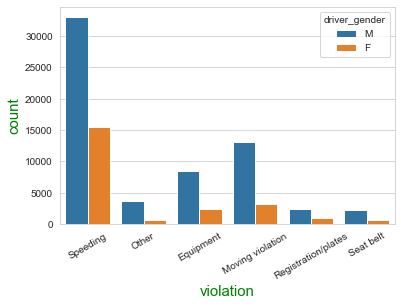

In [12]:
plt.figure()
sns.countplot(x="violation",hue="driver_gender",data=df)
plt.xticks(fontsize=10,rotation=30)
plt.xlabel("violation",fontsize=15,color="g")
plt.ylabel("count",fontsize=15,color="g")
plt.show()

## using the confidence interval to answer the question about the population

In [26]:
# the parameter is the proportion
df_test=df[["driver_gender","violation"]].query("violation=='Speeding'")


In [28]:
df_test.driver_gender.value_counts(normalize=True)[0]

0.6805266090258145

In [35]:
# the parameter the proportion of men that make speeding violation
sample_distribution=[]
for _ in range(10000):
    sample=df_test.sample(30000,replace=True)
    statistic=sample.driver_gender.value_counts(normalize=True)[0]
    sample_distribution.append(statistic)

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


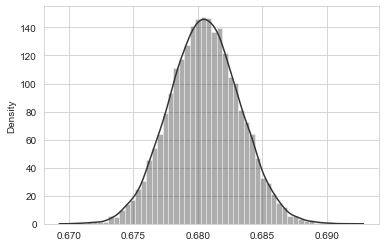

In [36]:
plt.figure()
sns.distplot(sample_distribution,kde=True,color="#333")
plt.show()

In [37]:
np.percentile(sample_distribution,2.5),np.percentile(sample_distribution,97.5)
# this says that we are confident by 95% that the parameter is in this range

(0.6752553005670024, 0.6858561952065069)

### <span style="color:blue"> from the confidence interval we see that men speed more than women on average for the population

## <span style="color:red"> now using the hypothesis test </span>

- the H0 [ men and women speed likly or less ]  ( Proportion of men =< proportion of women )
- the h1 [ men speed more that women ]  ( Proportion of men > proportion of women )

In [38]:
# now we take a sample and get the mean and the std of the sample distribution
sample1=df_test.sample(2000)

In [39]:
p=[]
for _ in range(10000):
    sample=df_test.sample(30000,replace=True)
    statistic=sample.driver_gender.value_counts(normalize=True)[0]
    p.append(statistic)

In [40]:
np.std(p)

0.002679035088846609

In [43]:
null_vals=np.random.normal(loc=.5,scale=np.std(p),size=10000)

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


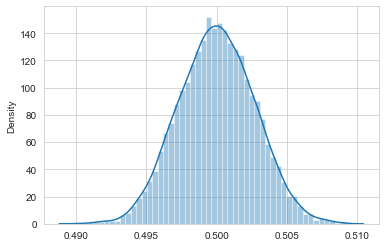

In [56]:
plt.figure()
sns.distplot(null_vals)
plt.show()

In [55]:
 (null_vals > sample1.driver_gender.value_counts(normalize=True)[0]).mean()

0.0

## lets reconduct the hypothesis test
- H0 [ proportion of men = proprtion of women ]
- H1 [ proportion of men ~= proprtion on women ]

In [58]:
upper= sample1.driver_gender.value_counts(normalize=True)[0]
lower= .5 - ( upper - .5)
(null_vals > upper ).mean()+ (null_vals < lower).mean()

0.0

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


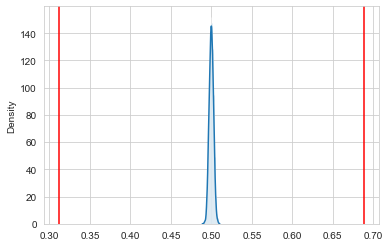

In [60]:
plt.figure()
sns.distplot(null_vals)
plt.axvline(x=lower,color="red")
plt.axvline(x=upper,color="red")
plt.show()

### from the p-value we reject the null hypothesis and we say that, the proportion of men not equal the proportion of women

## lets reconduct the hypothesis test
- H0 [ proportion of men >=proprtion of women ]
- H1 [ proportion of men < proprtion on women ]


In [62]:
(null_vals < upper).mean()

1.0

## <span style="color:blue">here we accept the null hypothesis

## another good plot

In [12]:
df.groupby("driver_gender").violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

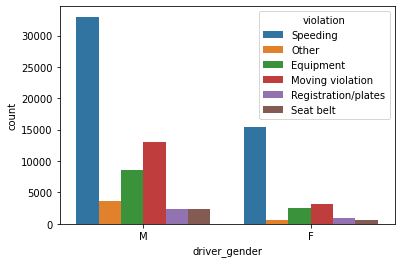

In [13]:
plt.figure()
sns.countplot(x="driver_gender",hue="violation",data=df)
plt.show()

 # question [2]
 ## does gender affect who get searched during a stop?
 - i think the columns ara [ driver_gender , search_Conducted ]

In [14]:
df.groupby("driver_gender").search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [15]:
df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [16]:
# we can simplify that code
df.search_conducted.mean()
# as true = 1 , false=0 so it give the percent of tures

0.03483720473942948

In [17]:
df.groupby("driver_gender").search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

## is this gives the answer of the question? what affect the search to be conducted
## lests see the effect of violation

In [18]:
df.groupby(["driver_gender","violation"]).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

### from the data we see that the search is conducted for men more that women, <span style="color:red">but does this mean we can say in general that men get more search_conducted than women </span>

### no, we must conduct a hyposisi test and get the p_value  

# [3] why search_type values is missing ?

In [19]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [20]:
df.search_type.isna().sum()

88545

### from the above we get that, because there was no seach conducted

### note: value_counts() drop nan values by default
### or we can do it as -> value_counts(dropna=False) for count the Nan values

In [21]:
df.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

# [4] during the search, how often the driver frisked ?

In [22]:
def count(s):
    count=0
    for i in s.index:
        if "Protective Frisk" in i:
            count+= s[i]
    return count
s=df.search_type.value_counts()
count(s)

274

#### another method -> simple one

In [23]:
df.search_type.str.contains("Protective Frisk").value_counts()
# it return a series in the shape of the main series with True if it contain the string or false if it doesn't 

False    2922
True      274
Name: search_type, dtype: int64

In [24]:
contain=df.search_type.str.contains("Protective Frisk")

In [25]:
contain.sum()
# as true=1 , false=0 , Nan-> not taken

274

In [26]:
contain.mean()
# the percent of the true values 

0.08573216520650813

In [27]:
contain.value_counts(normalize=True)

False    0.914268
True     0.085732
Name: search_type, dtype: float64

In [28]:
contain.value_counts(normalize=True,dropna=False)

NaN      0.965163
False    0.031851
True     0.002987
Name: search_type, dtype: float64

## which year has the least number of stops

In [29]:
new=df.copy()
pd.to_datetime(new.stop_date).dt.year.value_counts().nsmallest(1)

2005    2558
Name: stop_date, dtype: int64

#### so the year with the least number of stops is (2005)
####  i guess  this is return to the small number of cars people had then and also the small population 

### <span style="color:blue"> another method </span> cool method

In [30]:
df.stop_date.str.slice(0,4).value_counts().nsmallest(1)

2005    2558
Name: stop_date, dtype: int64

#### cat() method in strings

In [31]:
combined= df.stop_date.str.cat(df.stop_time,sep=" ")
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

# [5] how does drug activity change by time of day ?

In [37]:
df.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [39]:
df["date_time"]=pd.to_datetime(combined)
df["date_time"]

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: date_time, Length: 91741, dtype: datetime64[ns]

<AxesSubplot:xlabel='date_time'>

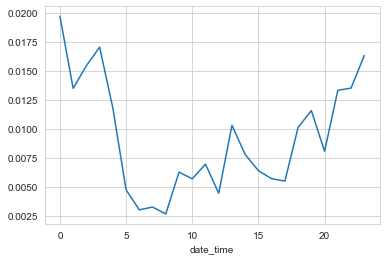

In [58]:
df.groupby(df.date_time.dt.hour).drugs_related_stop.mean().plot(kind="line")

# [6] do most stops occure at night ?

- dinfe the night -> it is [  8:01 PM until 5:59 AM ] from google [20,21,22,23,0,1,2,3,4,5]
- then count the number of stops during this time 
- compare that count to the totale count of stops

In [1]:
night=df[df.date_time.dt.hour.isin([20,21,22,23,0,1,2,3,4,5])].count() 
night

NameError: name 'df' is not defined

In [66]:
(night/df.shape[0])*100

30.75506044189621

### it seems that most stops occure during the evening

### <span style="color:blue"> another cool method </span>

<AxesSubplot:>

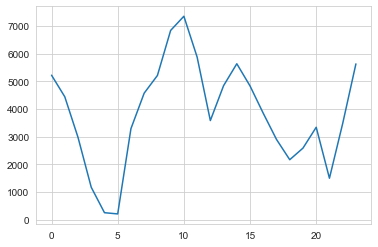

In [72]:
df.date_time.dt.hour.value_counts().sort_index().plot()

### from the plot also the most stops occure at day

# [7] find the bad data in the stop_duration column and fix it

In [83]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [97]:
df.loc[df.stop_duration.isin(["2","1"]),"stop_duration"]=np.nan

In [98]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [99]:
ind= df[df.stop_duration.isna()].index
ind

Int64Index([   25,    29,    52,   110,   124,   150,   205,   226,   314,
              318,
            ...
            91546, 91549, 91584, 91590, 91614, 91637, 91660, 91674, 91710,
            91713],
           dtype='int64', length=5335)

In [102]:
final= df.copy()
final.drop(ind,inplace=True)

In [103]:
final.isna().sum()

stop_date                 0
stop_time                 0
driver_gender             2
driver_age_raw            1
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
date_time                 0
dtype: int64